# "Nonlinear" linear regression (polynomial regression) example

Here we do the following:

1. Generate synthetic X/y data where y is quadratic in X
2. Solve for optimal $\theta$ with degree 2 polynomial expansion of X
3. Plot the results

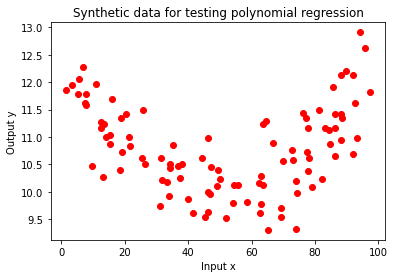

[[ 1.25e+01]
 [-1.00e-01]
 [ 1.00e-03]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data

# Suppose the true mean is f(x) = 0.001*(x-50)^2+10
# f(x) = 0.001 (x^2 - 100x + 2500) + 10

theta_true = np.array([[12.5], [-0.1], [0.001]])

# Generate 100 points x between 0 and 100

X = np.random.uniform(0, 100, 100).reshape((100, 1))
X = np.concatenate((np.ones((100, 1)), X), 1)

X_expanded = np.concatenate((X, X[:,1:]**2), 1)

# Generate the "noisy" values of y for each X

y = X_expanded @ theta_true + np.random.normal(0, 0.5, (100, 1))

# Plot them

plt.plot(X[:,1], y, 'ro')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Synthetic data for testing polynomial regression')
plt.show()

(3, 1)


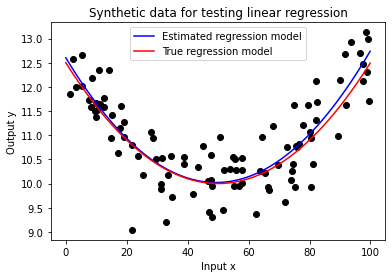

In [9]:
# Optimal parameters

theta_star = np.linalg.inv(X_expanded.T @ X_expanded) @ X_expanded.T @ y
print(theta_star.shape)
# Plot result

plt.plot(X[:,1], y, 'ko')

x_plot = np.arange(0, 100, 0.1).reshape((-1,1))
m_plot = x_plot.shape[0]
X_plot = np.concatenate((np.ones((m_plot, 1)), x_plot, x_plot * x_plot), 1)
y_plot = X_plot @ theta_star

plt.plot(x_plot, y_plot, 'b-', label='Estimated regression model')

y_plot = X_plot @ theta_true

plt.plot(x_plot, y_plot, 'r-', label='True regression model')

plt.legend()
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Synthetic data for testing linear regression')

plt.show()